In [1]:
import tensorflow as tf, tensorflow.keras as keras
import numpy as np, matplotlib.pyplot as plt

# Loading Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

## Dimensions

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

## Visual Inspection

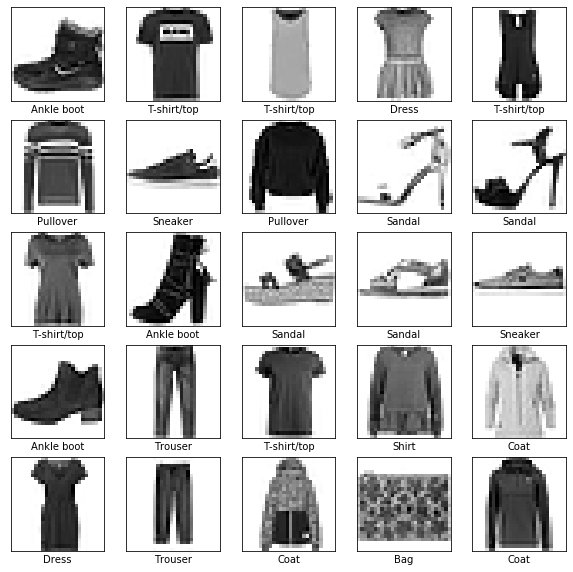

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Preprocessing

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Model

In [8]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

In [9]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [10]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5030 - accuracy: 0.8231
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3763 - accuracy: 0.8651
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3378 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3124 - accuracy: 0.8869
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2945 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2809 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2690 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2565 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2484 - accuracy: 0.9071
Epoch 10/10
6

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2558 - accuracy: 0.8818


In [13]:
test_acc

0.8818

In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([3.2336342e-08, 5.1325919e-11, 8.9580221e-10, 1.0205197e-10,
       5.4756338e-11, 2.2761380e-04, 4.2180228e-09, 2.0185013e-03,
       5.8249756e-09, 9.9775380e-01], dtype=float32)

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

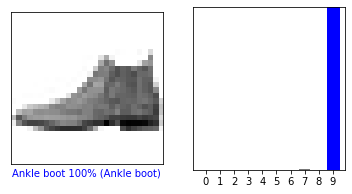

In [17]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

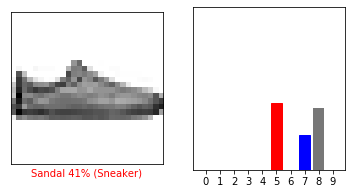

In [18]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

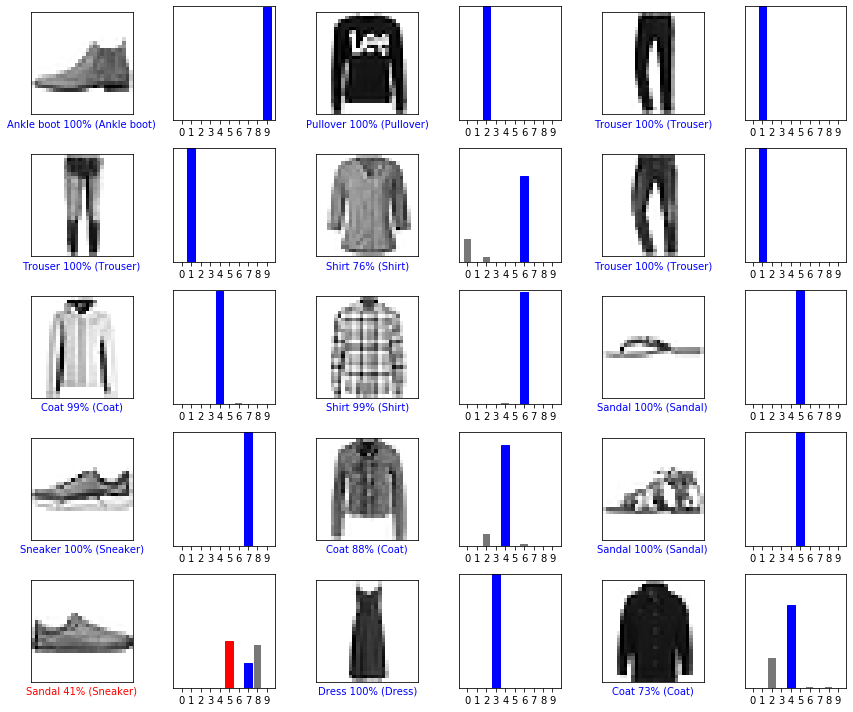

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Word Embeddings